# LVQ x2 implementation in  python 


We first import two useful libraries
1. numpy (matrix algebra):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. use tab and shift+tab for help

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import LVQUtils as lu

In [66]:
# this line plots graphs in line
%matplotlib inline


### First we generate a dataset

In [67]:
# C_g is the array for centroids
# 
M_g = 3
np.random.seed(3)



<function matplotlib.pyplot.show>

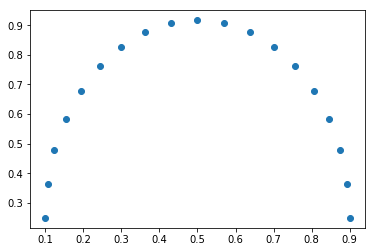

In [68]:
theta_deg = np.arange(0.0,181.0,10.0)
theta_rad = theta_deg*(np.pi/180.0)
C_g = np.zeros((len(theta_deg),2))
C_g[:,0]=np.cos(theta_rad)/2.5+0.5
C_g[:,1]=np.sin(theta_rad)/1.5+0.25

plt.figure()
plt.plot(C_g[:,0],C_g[:,1],'o')
plt.show

In [69]:
simple=False
if (simple):
    # we can also choose the centroids arbitarily
    C_g=np.array([[.25,.25],
                 [.75,.5],
                 [.45,.75]])
    
    
    # In[6]:
    
    
    # Generate data set ( M=3, centroid, constant sigma)
    #
    sigma=0.095
    number=100
    #
    # storing the centroid index (note this may not correspond to teh same number from the k-means algorithm)
    X11=np.concatenate((sigma*np.random.randn(number,2)+C_g[0],np.full((number,1),0.0)),axis=1)
    X22=np.concatenate((sigma*np.random.randn(number,2)+C_g[1],np.full((number,1),1.0)),axis=1)
    X33=np.concatenate((sigma*np.random.randn(number,2)+C_g[2],np.full((number,1),2.0)),axis=1)
    #
    #X=np.concatenate((X1,X2,X3), axis=0)
    X=np.concatenate((X11,X22,X33), axis=0)
else:
    # Generate data set ( M=3, centroid, constant sigma)
    #
    sigma=0.04
    number=20
    number0=200
    #
    # storing the centroid index (note this may not correspond to teh same number from the k-means algorithm)
    #X1=np.concatenate((1.3*sigma*np.random.randn(number0,2)+C_g[0],np.full((number0,1),0.0)),axis=1)
    X=np.zeros([number*len(C_g[:,0])+number0,3])
    for i in range(len(C_g[:,0])):
        #print i
        X[i*number:(i*number)+number,:]=np.concatenate((sigma*np.random.randn(number,2)+C_g[i],np.full((number,1),1.0)),axis=1)
    
    i = len(C_g[:,0])
    #print sigma*np.random.randn(number0,2)+np.array([0.5,0.5]
    X[i*number:(i*number)+number0,:]=np.concatenate((sigma*np.random.randn(number0,2)+np.array([0.5,1.2]),np.full((number0,1),2.0)),axis=1)



#
#X=np.concatenate((X1,X2,X3), axis=0)
#X=np.concatenate((X1,X2,X3,X4,X5,X6,X7,X8), axis=0)
np.random.shuffle(X)
print(X.shape) 

(580, 3)


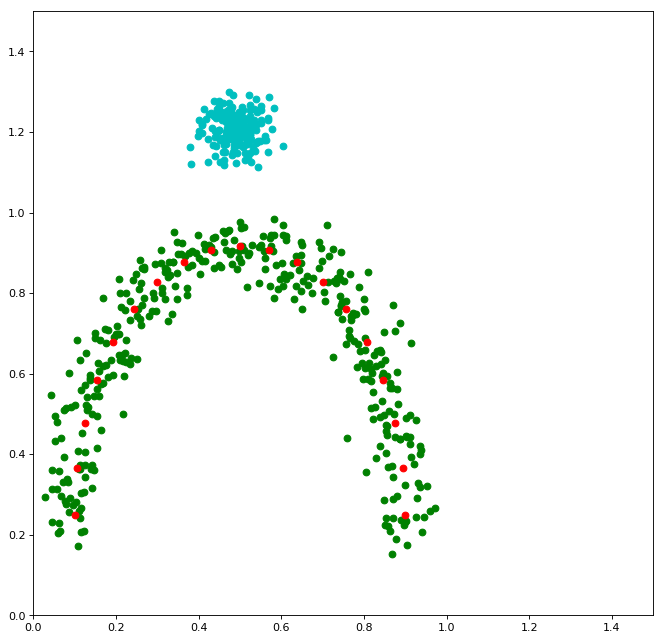

In [70]:
# plot data set and centroids
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X[:,0])):
    plt.plot(X[i,0],X[i,1],col[int(X[i,2])])

plt.plot(C_g[:,0],C_g[:,1],'ro')
plt.axis([0, 1.5, 0, 1.5])
plt.show()

In [71]:
#split data set into train and test
split = int((len(X[:,0]))*0.7)
print("Split point = ",split)
X_train=np.asarray(X[0:split,:])
print("Train size = ",len(X_train[:,0]))
X_test=np.asarray(X[split:,:])
print("Test size =",len(X_test[:,0]))

('Split point = ', 406)
('Train size = ', 406)
('Test size =', 174)


In [72]:
# LVQ Training function
def trainLVQ(trainData, initPrt, epochs, rateFunc):
    Prot=initPrt.copy()
    for t in range(0,epochs):
        for f in range(0, len(trainData[:,0])):
            feature=trainData[f,:]
            #print(feature)
        #    print(get_nearest_prototype(feature, Prt))    
            (dist, cls) = lu.get_nearest_prototype(feature[0:-1], Prot)
        #    print("dist=", dist, ", cls=", cls)
    #        print(Prt[cls[0],2])
            prt = Prot[cls[0],0:-1]
            if (Prot[cls[0],-1]==feature[-1]):    
        #        print("Match ->", Prt[cls[0],:], "=", feature)
                newPrt = prt + rateFunc(t) * (feature[0:-1]-prt)
#                print("Match: Old Prt=", prt, ", new Prt=", Prt[cls[0],0:-1], ", rate=", rateFunc(t))
            else:
            #    print("No Match ->", Prt[cls[0],:], "!=", feature)
                newPrt = prt - rateFunc(t) * (feature[0:-1]-prt)                        
                
            Prot[cls[0],0:-1] =     newPrt            

#            prt = Prot[cls[1],0:-1]
#            if (Prot[cls[1],-1]==feature[-1]):    
#        #        print("Match ->", Prt[cls[0],:], "=", feature)
#                newPrt = prt + rateFunc(t) * 0.5 * (feature[0:-1]-prt)
##                print("Match: Old Prt=", prt, ", new Prt=", Prt[cls[0],0:-1], ", rate=", rateFunc(t))
#            else:
#            #    print("No Match ->", Prt[cls[0],:], "!=", feature)
#                newPrt = prt - rateFunc(t) * 0.5 * (feature[0:-1]-prt)                        
#                
#            Prot[cls[1],0:-1] =     newPrt                
    #            print("MisMatch: Old Prt=", prt, ", new Prt=", Prt[cls[0],0:-1], ", rate=", rateFunc(t))            
#        plt.figure()
#        plt.title("t="+str(t))
#        col={0:'bo',1:'go', 2:'co'}
#        for i in range(len(trainData[:,0])):
#            plt.plot(trainData[i,0],trainData[i,1], "kx")#col[int(trainData[i,2])])
#        
#        for i in range(0,len(Prot[:,0])):
#            plt.plot(Prot[i,0],Prot[i,1],col[int(Prot[i,2])])
#            
#        plt.axis([0, 1.5, 0, 1.5])
#        plt.show()
    return Prot


[[ 1 50]
 [ 2 50]]
('Limits=', array([[ 0.02782047,  0.97154514],
       [ 0.15323667,  1.30047668]]))
[[ 0.04599224  0.3140373   1.        ]
 [ 0.49212688  1.21519357  2.        ]
 [ 0.48884496  1.23915088  2.        ]
 [ 0.91964963  0.37572892  1.        ]
 [ 0.5424576   1.11361448  2.        ]
 [ 0.42876232  0.91343393  1.        ]
 [ 0.26231444  0.77101217  1.        ]
 [ 0.52697929  1.18390851  2.        ]
 [ 0.43797224  0.90309795  1.        ]
 [ 0.8522339   0.45735673  1.        ]
 [ 0.76245493  0.70912585  1.        ]
 [ 0.2233277   0.68397036  1.        ]
 [ 0.51830614  1.1353208   2.        ]
 [ 0.28039923  0.74430171  1.        ]
 [ 0.54843058  1.25765752  2.        ]
 [ 0.41242105  1.25805488  2.        ]
 [ 0.15799958  0.60651507  1.        ]
 [ 0.61220371  0.8339755   1.        ]
 [ 0.45182199  1.23801623  2.        ]
 [ 0.87268741  0.50059285  1.        ]
 [ 0.43640742  1.24055012  2.        ]
 [ 0.56239839  1.17987699  2.        ]
 [ 0.17566849  0.62086061  1.        ]


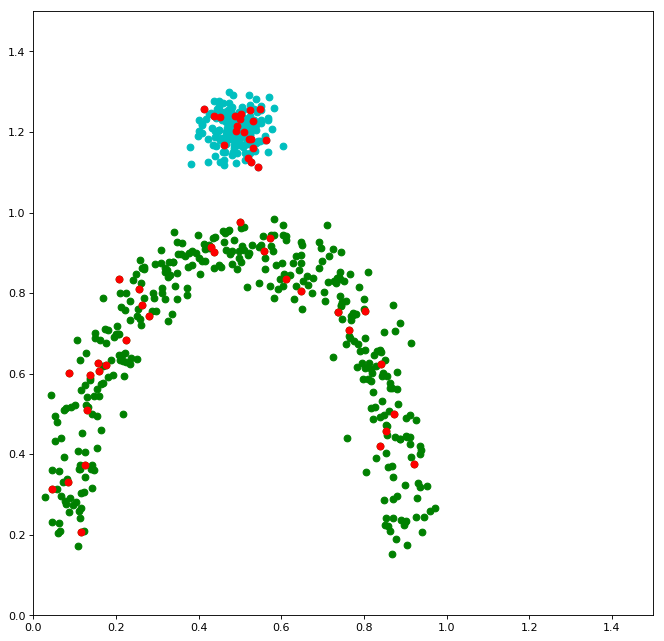

In [73]:
requiredAccuracy=0.8
numProtos=50

#labelSpec=np.reshape([0, numProtos, 1, numProtos, 2, numProtos], (3,2))
labelSpec=np.reshape([1, numProtos, 2, numProtos], (2,2))
print(labelSpec)

limits=np.reshape([np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])], (2,2))

print("Limits=", limits)
#Prt = lu.genPrototypes(labelSpec, limits)

protoNdxs = np.random.randint(0, X.shape[0], size=numProtos)

Prt = X[protoNdxs,:]
print Prt

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X[:,0])):
    plt.plot(X[i,0],X[i,1],col[int(X[i,2])])
    
plt.plot(Prt[:,0],Prt[:,1],'ro')
plt.axis([0, 1.5, 0, 1.5])
plt.show()


('Trimmed prototype set from', 50, 'points to', 49, 'points')
[[ 0.06649569  0.36547907  1.        ]
 [ 0.4418849   1.18379847  2.        ]
 [ 0.46308532  1.23968215  2.        ]
 [ 0.89647875  0.24784781  1.        ]
 [ 0.35096805  0.91356194  1.        ]
 [ 0.24390984  0.75894389  1.        ]
 [ 0.54306248  1.17489398  2.        ]
 [ 0.42275307  0.90341186  1.        ]
 [ 0.89058727  0.38489212  1.        ]
 [ 0.77559984  0.66673898  1.        ]
 [ 0.1850954   0.69706896  1.        ]
 [ 0.46962186  1.12429432  2.        ]
 [ 0.33092559  0.86018461  1.        ]
 [ 0.54109607  1.22824352  2.        ]
 [ 0.43346603  1.24594461  2.        ]
 [ 0.16707952  0.57303902  1.        ]
 [ 0.68695722  0.91132324  1.        ]
 [ 0.40596765  1.21421097  2.        ]
 [ 0.84459075  0.59105429  1.        ]
 [ 0.44596308  1.2686192   2.        ]
 [ 0.57387817  1.18649674  2.        ]
 [ 0.22489563  0.6329952   1.        ]
 [ 0.11960547  0.58478823  1.        ]
 [ 0.51734514  1.13455008  2.        ]
 [

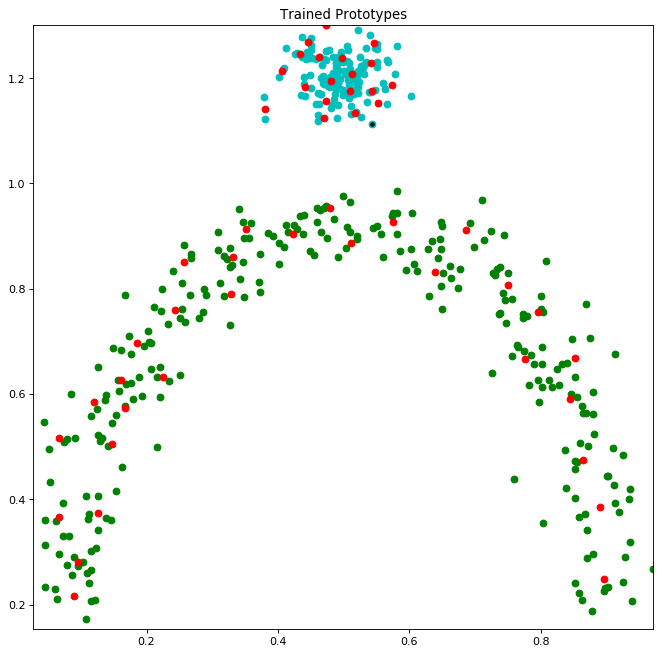

In [74]:
trainedPrt = trainLVQ(X_train, Prt, 20, lambda t: 0.5*np.exp(-0.1*t))
#trimmedPrt = trainedPrt.copy()
trimmedPrt = trainedPrt[trainedPrt[:,0]!=Prt[:,0],:]
span = limits[:,1]-limits[:,0]
trimmedPrt = trimmedPrt[(trimmedPrt[:,0]>limits[0,0]-(3*span[0]))]
trimmedPrt = trimmedPrt[(trimmedPrt[:,0]<limits[0,1]+(3*span[0]))]
trimmedPrt = trimmedPrt[(trimmedPrt[:,0]>limits[1,0]-(3*span[1]))]
trimmedPrt = trimmedPrt[(trimmedPrt[:,0]<limits[1,1]+(3*span[1]))]
deadPrt = trainedPrt[trainedPrt[:,0]==Prt[:,0],:]
print("Trimmed prototype set from", len(Prt[:,0]), "points to" , len(trimmedPrt[:,0]), "points")
#print(len(deadPrt[:,0]))
#print( "Trained Prototypes=", trainedPrt)

print(trimmedPrt)
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Trained Prototypes")
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X_train[:,0])):
    plt.plot(X_train[i,0],X_train[i,1],col[int(X_train[i,2])])

plt.plot(trimmedPrt[:,0],trimmedPrt[:,1],'ro')
plt.plot(deadPrt[:,0],deadPrt[:,1],'k.')
plt.axis([np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])])
plt.show()


In [75]:
def runTestSet(X_test, Prots):
    # Do test set
    predictedClasses = X_test[:,-1].copy()
    
    for i in range(0, len(X_test[:,0])):
        (dist,cls) = lu.get_nearest_prototype(X_test[i,0:-1], Prots)
        predictedClasses[i] = Prots[cls[0],-1]
        
    return predictedClasses
    

In [76]:
predictedClasses = runTestSet(X_test, trimmedPrt)

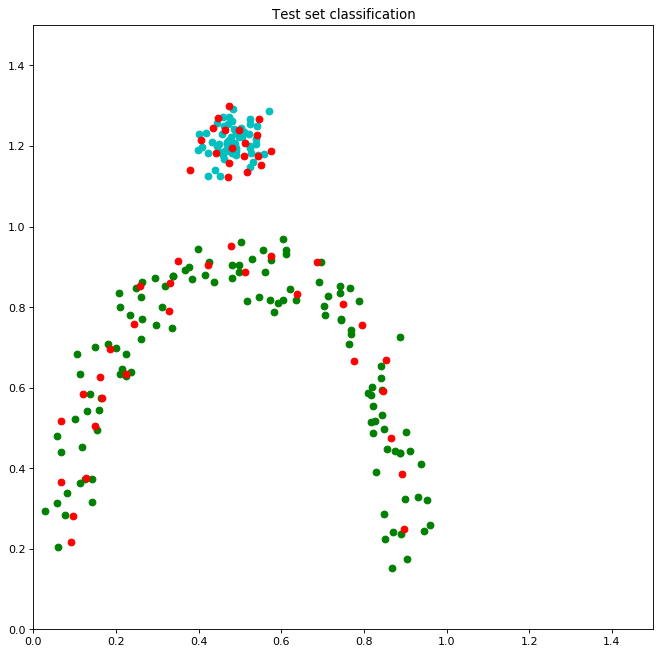

In [77]:
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Test set classification")
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X_test[:,0])):
    plt.plot(X_test[i,0],X_test[i,1],col[int(predictedClasses[i])])

plt.plot(trimmedPrt[:,0],trimmedPrt[:,1],'ro')

plt.axis([0, 1.5, 0, 1.5])
plt.show()    

In [78]:
# Calculate accuracy
accuracy = float(sum(predictedClasses==X_test[:,-1]))/len(X_test[:,0])
print("Accuracy(", len(trimmedPrt[:,0]), ")=", accuracy)

unoptimizedAccuracy = accuracy
# Try removing prototypes at random
# Remove 20% at every iteration until accuracy drops to < 95%
prots = trimmedPrt.copy()

trialsPerStep=10

reducedAccuracy=0
bestReducedPrt = trimmedPrt
while (len(prots[:,0]>=1)):
    print("-------------------------------------------------")        
    print("Trying ", trialsPerStep, "reductions of ", len(prots[:,0]), "prototypes...")
    print("reducedAccuracy=", reducedAccuracy)
    
    localBestAcc=0
    localBestPrt=bestReducedPrt
    for i in range(0, trialsPerStep):    

        rndNdx = (np.random.rand(int(len(prots[:,0])*0.2))*len(prots[:,0])).astype(int)
        print(rndNdx)
        mask = np.ones(len(prots[:,0]),dtype=bool) #np.ones_like(a,dtype=bool)
        mask[rndNdx] = False
            
        reducedPrt = prots[mask,:]
        
        print("mask len = ", len(mask))
        print("mask true=", sum(mask))
        print("reducedPrt len=", len(reducedPrt[:,0]))
        print("prots len=", len(prots[:,0]))
        if (len(reducedPrt[:,0]) == len(prots[:,0])):
            break
            
        predictedClasses = runTestSet(X_test, reducedPrt)
        
#        print("predictedClasses len=", len(predictedClasses))
#        print("X_test len=", len(X_test[:,-1]))
#        print(predictedClasses==X_test[:,-1])
#        print(sum(predictedClasses==X_test[:,-1]))
#        print(reducedPrt)
        acc = float(sum(predictedClasses==X_test[:,-1]))/len(X_test[:,0])
        print("trial acc=", acc)
        if (acc >= reducedAccuracy):
            localBestAcc=acc
            localBestPrt = reducedPrt.copy()    
    
    print("localBestAcc=", localBestAcc)
    print("localBestPrt=", localBestPrt)
    
    if (localBestAcc >= reducedAccuracy):
        reducedAccuracy = localBestAcc
        bestReducedPrt = localBestPrt.copy()
    else:
        break    

    prots = bestReducedPrt.copy()
    
    print("Accuracy with ", len(prots[:,0]), "prototypes=", reducedAccuracy)
#    if (len(prots[:,0])<=4):
#        break

prots = bestReducedPrt.copy()        
print("Best params: ",len(prots[:,0]), " at accuracy=", reducedAccuracy)
print(prots)

('Accuracy(', 49, ')=', 1.0)
-------------------------------------------------
('Trying ', 10, 'reductions of ', 49, 'prototypes...')
('reducedAccuracy=', 0)
[24 45 27 45  9 44 34 45 21]
('mask len = ', 49)
('mask true=', 42)
('reducedPrt len=', 42)
('prots len=', 49)
('trial acc=', 1.0)
[36 29 48 10 14 14 42 38 19]
('mask len = ', 49)
('mask true=', 41)
('reducedPrt len=', 41)
('prots len=', 49)
('trial acc=', 1.0)
[11 48  0  4 41 17 20 47  5]
('mask len = ', 49)
('mask true=', 40)
('reducedPrt len=', 40)
('prots len=', 49)
('trial acc=', 1.0)
[ 1 21 14  9  2  4  9 37 33]
('mask len = ', 49)
('mask true=', 41)
('reducedPrt len=', 41)
('prots len=', 49)
('trial acc=', 1.0)
[ 5 22 36 28 26 30 28  4  4]
('mask len = ', 49)
('mask true=', 42)
('reducedPrt len=', 42)
('prots len=', 49)
('trial acc=', 1.0)
[ 7 11 19 33  0 34  3 40  3]
('mask len = ', 49)
('mask true=', 41)
('reducedPrt len=', 41)
('prots len=', 49)
('trial acc=', 1.0)
[14 38  4 34 42 41 33 47  2]
('mask len = ', 49)
('mask 

('trial acc=', 1.0)
[13 15 23  6 17]
('mask len = ', 26)
('mask true=', 21)
('reducedPrt len=', 21)
('prots len=', 26)
('trial acc=', 1.0)
[16 13 22 24  9]
('mask len = ', 26)
('mask true=', 21)
('reducedPrt len=', 21)
('prots len=', 26)
('trial acc=', 1.0)
('localBestAcc=', 1.0)
('localBestPrt=', array([[ 0.4418849 ,  1.18379847,  2.        ],
       [ 0.35096805,  0.91356194,  1.        ],
       [ 0.42275307,  0.90341186,  1.        ],
       [ 0.77559984,  0.66673898,  1.        ],
       [ 0.1850954 ,  0.69706896,  1.        ],
       [ 0.68695722,  0.91132324,  1.        ],
       [ 0.40596765,  1.21421097,  2.        ],
       [ 0.84459075,  0.59105429,  1.        ],
       [ 0.22489563,  0.6329952 ,  1.        ],
       [ 0.32872487,  0.7902946 ,  1.        ],
       [ 0.14791476,  0.50426326,  1.        ],
       [ 0.25751478,  0.85123785,  1.        ],
       [ 0.09496415,  0.28095373,  1.        ],
       [ 0.37998563,  1.14127651,  2.        ],
       [ 0.47870703,  0.95243

('trial acc=', 1.0)
[4 1]
('mask len = ', 10)
('mask true=', 8)
('reducedPrt len=', 8)
('prots len=', 10)
('trial acc=', 0.9712643678160919)
[3 7]
('mask len = ', 10)
('mask true=', 8)
('reducedPrt len=', 8)
('prots len=', 10)
('trial acc=', 1.0)
[0 9]
('mask len = ', 10)
('mask true=', 8)
('reducedPrt len=', 8)
('prots len=', 10)
('trial acc=', 1.0)
[8 5]
('mask len = ', 10)
('mask true=', 8)
('reducedPrt len=', 8)
('prots len=', 10)
('trial acc=', 1.0)
[6 5]
('mask len = ', 10)
('mask true=', 8)
('reducedPrt len=', 8)
('prots len=', 10)
('trial acc=', 1.0)
('localBestAcc=', 1.0)
('localBestPrt=', array([[ 0.4418849 ,  1.18379847,  2.        ],
       [ 0.42275307,  0.90341186,  1.        ],
       [ 0.40596765,  1.21421097,  2.        ],
       [ 0.32872487,  0.7902946 ,  1.        ],
       [ 0.14791476,  0.50426326,  1.        ],
       [ 0.49684141,  1.23896327,  2.        ],
       [ 0.85239939,  0.66771895,  1.        ],
       [ 0.54583179,  1.26709395,  2.        ]]))
('Accura

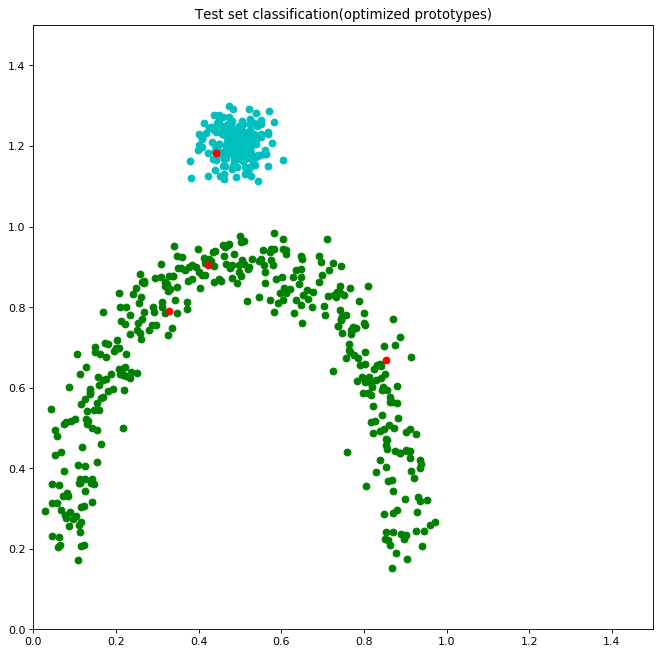

In [79]:
predictedClasses=runTestSet(X, prots)

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Test set classification(optimized prototypes)")
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X[:,0])):
    plt.plot(X[i,0],X[i,1],col[int(predictedClasses[i])])

plt.plot(prots[:,0],prots[:,1],'ro')

plt.axis([0, 1.5, 0, 1.5])
plt.show()    

